# Loading the Data

In [1]:
using CSV, DataFrames, DelimitedFiles, LinearAlgebra, JuMP, Cbc, Ipopt, Plots

In [2]:
R = CSV.read("rankings.csv", DataFrame, header=true)
D = CSV.read("dorm_info.csv", DataFrame, header=true)


students = R[:,1]
rankings = R[:, 4:end]
n = length(students)

dorms = D[:,1]
cap = D[:,2]
d=length(dorms)




9

In [3]:
R

Row,Student,Assignment,Gender,Baker House,Burton Conner,East Campus,MacGregor House,Maseeh Hall,McCormick Hall,Next House,Random Hall,Simmons Hall
,Int64,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1,Simmons Hall,0,2,5,8,6,4,7,3,9,1
2,2,Simmons Hall,1,2,5,7,6,4,99,3,8,1
3,3,Maseeh Hall,0,2,3,7,5,1,4,6,8,9
4,4,Maseeh Hall,1,3,6,5,4,1,99,7,8,2
5,5,Baker House,1,1,3,7,8,2,99,5,6,4
6,6,Next House,1,5,6,8,3,4,99,1,7,2
7,7,East Campus,0,6,2,1,9,7,8,5,4,3
8,8,McCormick Hall,0,3,4,5,2,9,1,6,8,7
9,9,McCormick Hall,0,5,4,6,3,8,1,7,9,2


In [4]:
n

1065

In [5]:
d

9

# Problem 1

## Part b

In [6]:
using Gurobi
m = Model(Gurobi.Optimizer)
set_silent(m)

@variable(m, x[1:n, 1:d], Bin)


# IMPLEMENT OBJECTIVE HERE
@objective(m, Min, sum(x[i,j]*rankings[i,j] for i in 1:n, j in 1:d))


    
@constraints(m, begin
    assignment[i = 1:n], sum(x[i, j] for j in 1:d) == 1
    capacity[j = 1:d], sum(x[i, j] for i in 1:n) <= cap[j]
end)
    


optimize!(m)
L = value.(x)
r1 = objective_value(m)

println("Assignments: ", L)
println("Objective value: ", r1)


Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-06


Assignments: [0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0; -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0

 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 0.0; -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 0.0 -0.0 -0.0 -0.0; -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.

 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 0.0 1.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0

; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 0.0 1.0 -0.0; -0.0 -0.0 0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0; -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -

 1.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; 0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0


Objective value: 1269.0


In [7]:
L

1065×9 Matrix{Float64}:
  0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0   1.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0   1.0
 -0.0  -0.0  -0.0  -0.0   1.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0   1.0  -0.0  -0.0  -0.0  -0.0
  1.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0   1.0  -0.0  -0.0
 -0.0  -0.0   1.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0   1.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0   1.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0   1.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0   1.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0   1.0  -0.0  -0.0
  1.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
  ⋮                             ⋮                
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0   1.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0   1.0
 -0.0  -0.0   1.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0   1.0  -0.0  -0.0
 -0.0  -

In [8]:
# Print the number of rows and columns
println("Number of rows in L:", size(L, 1))
println("Number of columns in L:", size(L, 2))

Number of rows in L:1065
Number of columns in L:9


In [9]:
#Creating the Results matrix that stores the student's original ranking of their final assignment from L
# Initialize an empty array to store the results
Results = []

# Iterate through every row of matrix L
for row_index in 1:size(L, 1)
    number_one = nothing
    # Iterate through every column of the current row
    for col_index in 1:size(L, 2)
        # Check if the value in the current cell is 1.0
        if L[row_index, col_index] == 1.0
            number_one = col_index
            break  # Exit the loop once 1.0 is found in the row
        end
    end
    
    # Check if a 1.0 was found in the row
    if number_one !== nothing
        # Get the value from the rankings matrix using the row and number_one index
        assigned_ranking = rankings[row_index, number_one]
        # Append the assigned_ranking to the Results array
        push!(Results, assigned_ranking)
    end
end

# Convert the Results array into a matrix with 1065 rows and 1 column
Results = reshape(Results, (length(Results), 1))

1065×1 Matrix{Any}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 3
 1
 1
 ⋮
 1
 1
 2
 1
 1
 1
 1
 1
 1
 1
 2
 1

In [11]:
#Get the number of students by the choice they got 
choice_counts = Dict()

# Iterate through values in Results and count occurrences
for choice in 1:9
    count = sum(Results .== choice)
    choice_counts[choice] = count
end

# Print the counts
println("Choice\tNumber of Students")
for choice in 1:9
    println("$choice\t$(choice_counts[choice])")
end

Choice	Number of Students
1	905
2	119
3	38
4	3
5	0
6	0
7	0
8	0
9	0


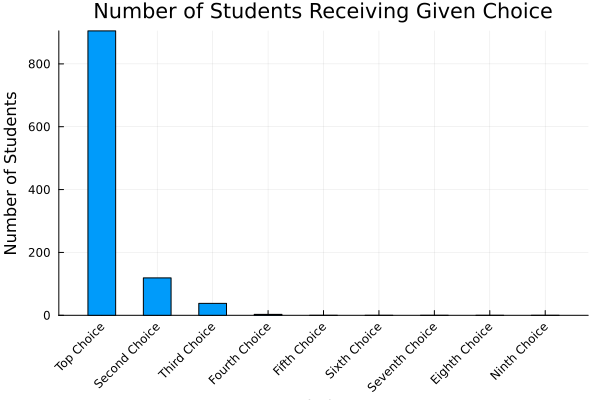

In [12]:
#Making choice assignments into a graph
# Define labels for choices
choice_labels = Dict(1 => "Top Choice", 2 => "Second Choice", 3 => "Third Choice", 
                     4 => "Fourth Choice", 5 => "Fifth Choice", 6 => "Sixth Choice", 
                     7 => "Seventh Choice", 8 => "Eighth Choice", 9 => "Ninth Choice")

# Initialize an array to store the counts
choice_counts = zeros(Int, 9)

# Iterate through values in Results and count occurrences
for choice in 1:9
    count = sum(Results .== choice)
    choice_counts[choice] = count
end

# Create arrays for x-axis (choice) and y-axis (number of students)
choices = [choice_labels[i] for i in 1:9]
counts = choice_counts[1:9] # Extract counts for the first 9 choices

# Create the bar plot
bar(choices, counts, 
    xlabel = "Choice",
    ylabel = "Number of Students",
    title = "Number of Students Receiving Given Choice",
    legend = false,
    xrotation = 45, # Rotate x-axis labels for better visibility
    bar_width = 0.5) # Adjust bar width if needed

## Part c

In [13]:
#Looking at the gender balance of our solution

In [14]:
#Getting the gender balanced df
using DataFrames

# Define the dorms dictionary
dorms_dict = Dict("Baker House" => 1, "Burton Conner" => 2, "East Campus" => 3,
                  "MacGregor House" => 4, "Maseeh Hall" => 5, "McCormick Hall" => 6,
                  "Next House" => 7, "Random Hall" => 8, "Simmons Hall" => 9)

# Sort the dorm names from the dictionary
sorted_dorms = sort(collect(keys(dorms_dict)))

# Convert L into a DataFrame with sorted dorm names as column names
df = DataFrame(L, Symbol.(sorted_dorms))

# Show the DataFrame with sorted dorm names as column names
show(df, allcols=true)

1065×9 DataFrame
  Row │ Baker House  Burton Conner  East Campus  MacGregor House  Maseeh Hall  McCormick Hall  Next House  Random Hall  Simmons Hall 
      │ Float64      Float64        Float64      Float64          Float64      Float64         Float64     Float64      Float64      
──────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │         0.0           -0.0         -0.0             -0.0         -0.0            -0.0        -0.0         -0.0           1.0
    2 │        -0.0           -0.0         -0.0             -0.0         -0.0            -0.0        -0.0         -0.0           1.0
    3 │        -0.0           -0.0         -0.0             -0.0          1.0            -0.0        -0.0         -0.0          -0.0
    4 │        -0.0           -0.0         -0.0             -0.0          1.0            -0.0        -0.0         -0.0          -0.0
    5 │         1.0           -0.0         -0.0  

In [15]:
# Extract the 3rd column from matrix R
gender_column = R[:, 3]

# Add the "Gender" column to the DataFrame df
df.Gender = gender_column

# Show the modified DataFrame
show(df, allcols=true)

1065×10 DataFrame
  Row │ Baker House  Burton Conner  East Campus  MacGregor House  Maseeh Hall  McCormick Hall  Next House  Random Hall  Simmons Hall  Gender 
      │ Float64      Float64        Float64      Float64          Float64      Float64         Float64     Float64      Float64       Int64  
──────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │         0.0           -0.0         -0.0             -0.0         -0.0            -0.0        -0.0         -0.0           1.0       0
    2 │        -0.0           -0.0         -0.0             -0.0         -0.0            -0.0        -0.0         -0.0           1.0       1
    3 │        -0.0           -0.0         -0.0             -0.0          1.0            -0.0        -0.0         -0.0          -0.0       0
    4 │        -0.0           -0.0         -0.0             -0.0          1.0            -0.0        -0.0         -0.0          -0.0 

In [16]:
df

Row,Baker House,Burton Conner,East Campus,MacGregor House,Maseeh Hall,McCormick Hall,Next House,Random Hall,Simmons Hall,Gender
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0
2,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,1
3,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,0
4,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,1
5,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1
6,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,1
7,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0
8,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,0
9,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,0


In [17]:
#Calculating a table for gender balance of our solution
using DataFrames

# Initialize empty vectors to store results
num_females = Int[]
num_males = Int[]
proportion_females = Float64[]

# Iterate over each dorm column in df
for col in names(df)# Exclude the last column (Gender)
    # Count the number of females and males in the column
    num_female = sum((df[!, col] .== 1.0) .& (df.Gender .== 0))
    num_male = sum((df[!, col] .== 1.0) .& (df.Gender .== 1))
    
    # Calculate the total number of students
    total_students = num_female + num_male
    
    # Calculate the proportion of females
    proportion_female = num_female / total_students
    
    # Append results to vectors
    push!(num_females, num_female)
    push!(num_males, num_male)
    push!(proportion_females, proportion_female)
end

# Create DataFrame with dorm names and counts
our_results_df = DataFrame(Dorm = names(df),
                           Number_of_Students = sum.(eachcol(df)),
                           Number_of_Females = num_females,
                           Number_of_Males = num_males,
                           Proportion_of_Females = proportion_females)

# Remove the last row from our_results_df, the gender row because is unecessary
our_results_df = our_results_df[1:9, :]

# Show the our_results_df DataFrame
show(our_results_df, allcols=true)

9×5 DataFrame
 Row │ Dorm             Number_of_Students  Number_of_Females  Number_of_Males  Proportion_of_Females 
     │ String           Real                Int64              Int64            Float64               
─────┼────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Baker House                   176.0                 71              105               0.403409
   2 │ Burton Conner                 110.0                 62               48               0.563636
   3 │ East Campus                   106.0                 58               48               0.54717
   4 │ MacGregor House                95.0                 36               59               0.378947
   5 │ Maseeh Hall                   235.0                 93              142               0.395745
   6 │ McCormick Hall                 78.0                 78                0               1.0
   7 │ Next House                    110.0                 36          

In [18]:
#Looking at the actual solution

In [19]:
using DataFrames

# Make a copy of matrix R
R_copy = copy(R)

# Define a function to find the assignment rank
function get_assignment_rank(row)
    column_name = Symbol(row[2])  # Convert the string value in column 2 to a symbol
    return row[column_name]  # Get the value at the specified column
end

# Add the assignment_rank column to R_copy using the function, the rank of the assignment 
R_copy.assignment_rank = get_assignment_rank.(eachrow(R_copy))


1065-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 3
 2
 3
 ⋮
 2
 3
 1
 1
 1
 1
 1
 1
 1
 1
 2
 1

In [20]:
R_copy

Row,Student,Assignment,Gender,Baker House,Burton Conner,East Campus,MacGregor House,Maseeh Hall,McCormick Hall,Next House,Random Hall,Simmons Hall,assignment_rank
,Int64,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1,Simmons Hall,0,2,5,8,6,4,7,3,9,1,1
2,2,Simmons Hall,1,2,5,7,6,4,99,3,8,1,1
3,3,Maseeh Hall,0,2,3,7,5,1,4,6,8,9,1
4,4,Maseeh Hall,1,3,6,5,4,1,99,7,8,2,1
5,5,Baker House,1,1,3,7,8,2,99,5,6,4,1
6,6,Next House,1,5,6,8,3,4,99,1,7,2,1
7,7,East Campus,0,6,2,1,9,7,8,5,4,3,1
8,8,McCormick Hall,0,3,4,5,2,9,1,6,8,7,1
9,9,McCormick Hall,0,5,4,6,3,8,1,7,9,2,1


In [21]:
using Statistics

# Calculate the sum of the assignment_rank column, which is the objective value 
total_assignment_rank = sum(R_copy.assignment_rank)

# Print the objective value
println("Objective Value of Actual Assignment: ", total_assignment_rank)

Objective Value of Actual Assignment: 1361


In [22]:
#Getting the gender balance for the actual solution
using Statistics
using DataFrames

# Get unique strings in row 2
unique_strings = unique(R_copy[:, 2])

# Initialize an empty matrix to store the counts and proportions
results_matrix = zeros(Float64, length(unique_strings), 4)

# Iterate over each unique string
for (i, string) in enumerate(unique_strings)
    # Count rows with the current string in row 2
    string_count = count(row -> row[2] == string, eachrow(R_copy))
    
    # Count rows with value 0 in column 3 for the current string (number of females)
    female_count = count(row -> row[2] == string && row[3] == 0, eachrow(R_copy))
    
    # Count rows with value 1 in column 3 for the current string (number of males)
    male_count = count(row -> row[2] == string && row[3] == 1, eachrow(R_copy))
    
    # Calculate the proportion of females
    female_proportion = female_count / string_count
    
    # Update the results matrix
    results_matrix[i, :] = [string_count, female_count, male_count, female_proportion]
end

# Set column names for the results matrix
column_names = ["Dorm", "Number_of_students", "Number_of_Females", "Number_of_Males", "Proportion_of_Females"]

# Create DataFrame with the results matrix and column names
results_df = DataFrame([unique_strings results_matrix], :auto)

# Set the column names
rename!(results_df, Symbol.(column_names))

# Display the results DataFrame
println("Results DataFrame:")
show(results_df, allcols=true)

Results DataFrame:
9×5 DataFrame
 Row │ Dorm             Number_of_students  Number_of_Females  Number_of_Males  Proportion_of_Females 
     │ Any              Any                 Any                Any              Any                   
─────┼────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Simmons Hall     136.0               55.0               81.0             0.404412
   2 │ Maseeh Hall      248.0               109.0              139.0            0.439516
   3 │ Baker House      176.0               70.0               106.0            0.397727
   4 │ Next House       108.0               35.0               73.0             0.324074
   5 │ East Campus      103.0               53.0               50.0             0.514563
   6 │ McCormick Hall   82.0                82.0               0.0              1.0
   7 │ Burton Conner    111.0               46.0               65.0             0.414414
   8 │ MacGregor House  86.0            

In [23]:
# Sort the rows of results_df alphabetically by the "Dorm" column
sort!(results_df, :Dorm)

# Display the sorted results DataFrame
println("Sorted Results DataFrame:")
show(results_df, allcols=true)

Sorted Results DataFrame:
9×5 DataFrame
 Row │ Dorm             Number_of_students  Number_of_Females  Number_of_Males  Proportion_of_Females 
     │ Any              Any                 Any                Any              Any                   
─────┼────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Baker House      176.0               70.0               106.0            0.397727
   2 │ Burton Conner    111.0               46.0               65.0             0.414414
   3 │ East Campus      103.0               53.0               50.0             0.514563
   4 │ MacGregor House  86.0                35.0               51.0             0.406977
   5 │ Maseeh Hall      248.0               109.0              139.0            0.439516
   6 │ McCormick Hall   82.0                82.0               0.0              1.0
   7 │ Next House       108.0               35.0               73.0             0.324074
   8 │ Random Hall      15.0     

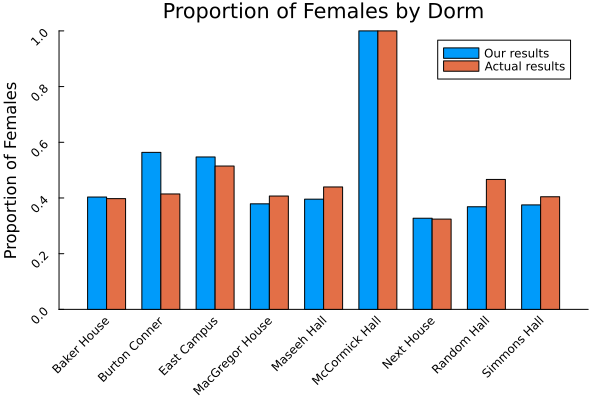

In [24]:
#Plotting the comparison of the gender balance between the solutions
using Plots

# Extract data from our_results_df and results_df
dorm_names = our_results_df.Dorm
our_proportions = our_results_df.Proportion_of_Females
results_proportions = results_df.Proportion_of_Females

# Define the width of each bar group
bar_width = 0.35

# Define the x-coordinates for the bars
x = 1:length(dorm_names)

# Create a bar plot with side-by-side bars
bar(x .- bar_width / 2, our_proportions, bar_width=bar_width, label="Our results")
bar!(x .+ bar_width / 2, results_proportions, bar_width=bar_width, label="Actual results")

# Customize the plot
plot!(
    title="Proportion of Females by Dorm",
    xlabel="Dorm",
    ylabel="Proportion of Females",
    legend=:topright,
    xticks=(1:length(dorm_names), dorm_names), # Set custom x-axis ticks
    rotation=45, # Rotate x-axis labels for better visibility
    grid=false # Turn off the grid lines
)

# Problem 4 (b)

In [25]:
Results

1065×1 Matrix{Any}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 3
 1
 1
 ⋮
 1
 1
 2
 1
 1
 1
 1
 1
 1
 1
 2
 1

In [26]:
#Get the ID's of students who didn't get their top choice originally 
# Initialize an empty array to store the indices
indices = []

# Loop through each row of the matrix
for i in 1:size(Results, 1)
    # Check if the value in the column is not equal to 1
    if Results[i, 1] != 1
        # If it's not equal to 1, add the index to the indices array
        push!(indices, i)
    end
end

# Print the list of indices
println("Indices where the value is not 1:")
println(indices)

Indices where the value is not 1:
Any[11, 23, 25, 28, 34, 44, 54, 59, 62, 67, 69, 75, 89, 90, 93, 130, 132, 140, 150, 161, 164, 169, 177, 179, 185, 186, 195, 199, 209, 217, 233, 235, 236, 239, 240, 248, 258, 262, 271, 273, 276, 282, 285, 290, 303, 316, 318, 319, 320, 323, 325, 330, 341, 346, 356, 357, 390, 404, 410, 415, 416, 433, 435, 439, 462, 466, 487, 489, 491, 493, 498, 515, 530, 533, 543, 552, 561, 563, 585, 593, 595, 609, 610, 620, 622, 632, 641, 644, 646, 654, 661, 665, 675, 688, 693, 700, 701, 706, 719, 720, 737, 747, 749, 752, 764, 769, 773, 779, 784, 788, 797, 799, 802, 812, 818, 825, 830, 836, 838, 841, 842, 844, 846, 855, 859, 870, 874, 877, 878, 885, 886, 892, 895, 897, 899, 902, 909, 915, 945, 946, 949, 959, 975, 978, 982, 988, 989, 996, 998, 1005, 1018, 1024, 1025, 1028, 1029, 1036, 1037, 1041, 1056, 1064]


In [27]:
R

Row,Student,Assignment,Gender,Baker House,Burton Conner,East Campus,MacGregor House,Maseeh Hall,McCormick Hall,Next House,Random Hall,Simmons Hall
,Int64,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1,Simmons Hall,0,2,5,8,6,4,7,3,9,1
2,2,Simmons Hall,1,2,5,7,6,4,99,3,8,1
3,3,Maseeh Hall,0,2,3,7,5,1,4,6,8,9
4,4,Maseeh Hall,1,3,6,5,4,1,99,7,8,2
5,5,Baker House,1,1,3,7,8,2,99,5,6,4
6,6,Next House,1,5,6,8,3,4,99,1,7,2
7,7,East Campus,0,6,2,1,9,7,8,5,4,3
8,8,McCormick Hall,0,3,4,5,2,9,1,6,8,7
9,9,McCormick Hall,0,5,4,6,3,8,1,7,9,2


In [28]:
#Print the preferences of these unsatisfied students
using DataFrames

# Assuming R is your DataFrame

# Initialize an empty DataFrame to store the filtered rows
filtered_df = DataFrame()

# Loop through the indices obtained in the previous step
for index in indices
    # Append the row corresponding to the index to the filtered_df DataFrame
    push!(filtered_df, R[index, :])
end


Filtered DataFrame:
160×12 DataFrame
 Row │ Student  Assignment       Gender  Baker House  Burton Conner  East Campus  MacGregor House  Maseeh Hall  McCormick Hall  Next House  Random Hall  Simmons Hall 
     │ Int64    String15         Int64   Int64        Int64          Int64        Int64            Int64        Int64           Int64       Int64        Int64        
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │      11  East Campus           0            6              1            3                4            7               9           5            8             2
   2 │      23  East Campus           0            6              5            2                1            8               4           7            3             9
   3 │      25  Simmons Hall          0            9              8            4                3            7               5    

 160 │    1064  MacGregor House       1            4              3            7                2            6              99           5            8             1


In [29]:
#This gives the preferences of students who didn't get their top choice
filtered_df

Row,Student,Assignment,Gender,Baker House,Burton Conner,East Campus,MacGregor House,Maseeh Hall,McCormick Hall,Next House,Random Hall,Simmons Hall
,Int64,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,11,East Campus,0,6,1,3,4,7,9,5,8,2
2,23,East Campus,0,6,5,2,1,8,4,7,3,9
3,25,Simmons Hall,0,9,8,4,3,7,5,2,6,1
4,28,East Campus,1,5,4,3,7,6,99,1,8,2
5,34,Simmons Hall,0,5,7,9,3,2,4,6,8,1
6,44,Next House,1,4,6,5,8,3,99,2,7,1
7,54,Maseeh Hall,1,3,7,2,6,1,99,4,8,5
8,59,Next House,1,4,3,7,2,6,99,1,8,5
9,62,East Campus,1,2,7,3,4,5,99,1,8,6


In [35]:
#Now we will do the same for our actual assignment, defined earlier as df
#Create a column for student ids
df.Student = 1:nrow(df)
df

Row,Baker House,Burton Conner,East Campus,MacGregor House,Maseeh Hall,McCormick Hall,Next House,Random Hall,Simmons Hall,Gender,student_id,Student
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64
1,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0,1,1
2,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,1,2,2
3,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,0,3,3
4,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,1,4,4
5,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1,5,5
6,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,1,6,6
7,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0,7,7
8,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,0,8,8
9,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,0,9,9


In [36]:
#Getting our assignment of students who didn't get their top choice
using DataFrames
# Initialize an empty DataFrame to store the filtered rows
filtered_assign_df = DataFrame()

# Loop through the indices obtained in the previous step
for index in indices
    # Append the row corresponding to the index to the filtered_assign_df DataFrame
    push!(filtered_assign_df, df[index, :])
end

filtered_assign_df

Row,Baker House,Burton Conner,East Campus,MacGregor House,Maseeh Hall,McCormick Hall,Next House,Random Hall,Simmons Hall,Gender,student_id,Student
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64
1,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0,11,11
2,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0,23,23
3,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0,25,25
4,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,1,28,28
5,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,0,34,34
6,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,1,44,44
7,-0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,1,54,54
8,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,0.0,-0.0,-0.0,1,59,59
9,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,1,62,62


In [37]:
filtered_df

Row,Student,Assignment,Gender,Baker House,Burton Conner,East Campus,MacGregor House,Maseeh Hall,McCormick Hall,Next House,Random Hall,Simmons Hall
,Int64,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,11,East Campus,0,6,1,3,4,7,9,5,8,2
2,23,East Campus,0,6,5,2,1,8,4,7,3,9
3,25,Simmons Hall,0,9,8,4,3,7,5,2,6,1
4,28,East Campus,1,5,4,3,7,6,99,1,8,2
5,34,Simmons Hall,0,5,7,9,3,2,4,6,8,1
6,44,Next House,1,4,6,5,8,3,99,2,7,1
7,54,Maseeh Hall,1,3,7,2,6,1,99,4,8,5
8,59,Next House,1,4,3,7,2,6,99,1,8,5
9,62,East Campus,1,2,7,3,4,5,99,1,8,6


### Rerunning the Optimization with Altered Preferences

In [38]:
#Rerunning the Optimization after changing the ranks of certain students 
R_changed = copy(R)

Row,Student,Assignment,Gender,Baker House,Burton Conner,East Campus,MacGregor House,Maseeh Hall,McCormick Hall,Next House,Random Hall,Simmons Hall
,Int64,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1,Simmons Hall,0,2,5,8,6,4,7,3,9,1
2,2,Simmons Hall,1,2,5,7,6,4,99,3,8,1
3,3,Maseeh Hall,0,2,3,7,5,1,4,6,8,9
4,4,Maseeh Hall,1,3,6,5,4,1,99,7,8,2
5,5,Baker House,1,1,3,7,8,2,99,5,6,4
6,6,Next House,1,5,6,8,3,4,99,1,7,2
7,7,East Campus,0,6,2,1,9,7,8,5,4,3
8,8,McCormick Hall,0,3,4,5,2,9,1,6,8,7
9,9,McCormick Hall,0,5,4,6,3,8,1,7,9,2


In [43]:
#Changing the preferences of student 11:
using DataFrames

# Find the index of the row where "Student" is 11
row_index = findfirst(R_changed[:, :Student] .== 11)

# Check if the row exists
if !isnothing(row_index)
    # Update the values in the corresponding row
    R_changed[row_index, "Burton Conner"] = 1
    R_changed[row_index, "Simmons Hall"] = 2
    R_changed[row_index, "Maseeh Hall"] = 3
    R_changed[row_index, "East Campus"] = 7
end

filtered_row = filter(row -> row.Student == 11, R_changed)

Row,Student,Assignment,Gender,Baker House,Burton Conner,East Campus,MacGregor House,Maseeh Hall,McCormick Hall,Next House,Random Hall,Simmons Hall
,Int64,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,11,East Campus,0,6,1,7,4,3,9,5,8,2


In [44]:
#Changing the preferences of student 23:
using DataFrames

# Find the index of the row where "Student" is 23
row_index = findfirst(R_changed[:, :Student] .== 23)

# Check if the row exists
if !isnothing(row_index)
    # Update the values in the corresponding row
    R_changed[row_index, "Simmons Hall"] = 2
    R_changed[row_index, "Maseeh Hall"] = 3
    R_changed[row_index, "East Campus"] = 9
    R_changed[row_index, "Random Hall"] = 8
end

filtered_row = filter(row -> row.Student == 23, R_changed)

Row,Student,Assignment,Gender,Baker House,Burton Conner,East Campus,MacGregor House,Maseeh Hall,McCormick Hall,Next House,Random Hall,Simmons Hall
,Int64,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,23,East Campus,0,6,5,9,1,3,4,7,8,2


In [45]:
#Changing the preferences of student 25:
using DataFrames

# Find the index of the row where "Student" is 25
row_index = findfirst(R_changed[:, :Student] .== 25)

# Check if the row exists
if !isnothing(row_index)
    # Update the values in the corresponding row
    R_changed[row_index, "Simmons Hall"] = 3
    R_changed[row_index, "MacGregor House"] = 2
    R_changed[row_index, "Next House"] = 1

end

filtered_row = filter(row -> row.Student == 25, R_changed)

Row,Student,Assignment,Gender,Baker House,Burton Conner,East Campus,MacGregor House,Maseeh Hall,McCormick Hall,Next House,Random Hall,Simmons Hall
,Int64,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,25,Simmons Hall,0,9,8,4,2,7,5,1,6,3


In [46]:
#Changing the preferences of student 28:
using DataFrames

# Find the index of the row where "Student" is 28
row_index = findfirst(R_changed[:, :Student] .== 28)

# Check if the row exists
if !isnothing(row_index)
    # Update the values in the corresponding row
    R_changed[row_index, "Maseeh Hall"] = 3
    R_changed[row_index, "East Campus"] = 6
end

filtered_row = filter(row -> row.Student == 28, R_changed)

Row,Student,Assignment,Gender,Baker House,Burton Conner,East Campus,MacGregor House,Maseeh Hall,McCormick Hall,Next House,Random Hall,Simmons Hall
,Int64,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,28,East Campus,1,5,4,6,7,3,99,1,8,2


In [47]:
#Changing the preferences of student 59:
using DataFrames

# Find the index of the row where "Student" is 59
row_index = findfirst(R_changed[:, :Student] .== 59)

# Check if the row exists
if !isnothing(row_index)
    # Update the values in the corresponding row
    R_changed[row_index, "Maseeh Hall"] = 2
    R_changed[row_index, "MacGregor House"] = 6
    R_changed[row_index, "Simmons Hall"] = 3
    R_changed[row_index, "Burton Conner"] = 5
    

end

filtered_row = filter(row -> row.Student == 59, R_changed)

Row,Student,Assignment,Gender,Baker House,Burton Conner,East Campus,MacGregor House,Maseeh Hall,McCormick Hall,Next House,Random Hall,Simmons Hall
,Int64,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,59,Next House,1,4,5,7,6,2,99,1,8,3


In [48]:
#Redefining the ranking column 
rankings_changed = R_changed[:, 4:end]

Row,Baker House,Burton Conner,East Campus,MacGregor House,Maseeh Hall,McCormick Hall,Next House,Random Hall,Simmons Hall
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,2,5,8,6,4,7,3,9,1
2,2,5,7,6,4,99,3,8,1
3,2,3,7,5,1,4,6,8,9
4,3,6,5,4,1,99,7,8,2
5,1,3,7,8,2,99,5,6,4
6,5,6,8,3,4,99,1,7,2
7,6,2,1,9,7,8,5,4,3
8,3,4,5,2,9,1,6,8,7
9,5,4,6,3,8,1,7,9,2


In [49]:
#Rerunning the optimization on these updated rankings
using Gurobi
m = Model(Gurobi.Optimizer)
set_silent(m)

@variable(m, x[1:n, 1:d], Bin)


# IMPLEMENT OBJECTIVE HERE
@objective(m, Min, sum(x[i,j]*rankings_changed[i,j] for i in 1:n, j in 1:d))


    
@constraints(m, begin
    assignment[i = 1:n], sum(x[i, j] for j in 1:d) == 1
    capacity[j = 1:d], sum(x[i, j] for i in 1:n) <= cap[j]
end)
    


optimize!(m)
L = value.(x)
r1 = objective_value(m)

println("Assignments: ", L)
println("Objective value: ", r1)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-06


Assignments: [0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0; -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.

 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 0.0 -0.0; -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0

-0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.

-0.0 1.0 -0.0 -0.0 -0.0; -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0; -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 0.0 1.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 

-0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 1.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 1.0 -0.0 -0.0 0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 1.0 -0.0 0.0 -0.0 -0.0 -0.0 -0.0; 0.0 -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0; -0.0 -0.0 -0.0 -0.0 1.0 -0.0 -0.

In [50]:
#Creating the Results matrix that stores the student's original ranking of their final assignment from L
# Initialize an empty array to store the results
Results = []

# Iterate through every row of matrix L
for row_index in 1:size(L, 1)
    number_one = nothing
    # Iterate through every column of the current row
    for col_index in 1:size(L, 2)
        # Check if the value in the current cell is 1.0
        if L[row_index, col_index] == 1.0
            number_one = col_index
            break  # Exit the loop once 1.0 is found in the row
        end
    end
    
    # Check if a 1.0 was found in the row
    if number_one !== nothing
        # Get the value from the rankings matrix using the row and number_one index
        assigned_ranking = rankings[row_index, number_one]
        # Append the assigned_ranking to the Results array
        push!(Results, assigned_ranking)
    end
end

# Convert the Results array into a matrix with 1065 rows and 1 column
Results = reshape(Results, (length(Results), 1))


1065×1 Matrix{Any}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 2
 2
 1
 1
 1
 1
 1
 1
 1
 2
 1

In [51]:
# Printing the new choice assignments of the targetted students

# Define the indices of interest
indices_of_interest = [11, 23, 25, 28, 59]

# Print the rows at the specified indices
println("Results at specified indices:")
for index in indices_of_interest
    println(Results[index])
end

Results at specified indices:
1
1
2
1
1
